In [ ]:
import os
import subprocess
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

FIGSIZE = (10,5)
# Lista de configurações para testar
# Ordem: taxa_chegada, tempo_medio, num_servidores, tempo_observação
CENARIOS_QUESTAO_2 = [[x, 0.88, 10, 10] for x in range(10, 50, 2)]

def rodar_simulador(taxa_chegada, tempo_medio_servico, num_servidores, tempo_observacao):
    comando = [
        "java", "-cp", "bin:lib/*", "ServidorWeb",
        str(taxa_chegada), 
        str(tempo_medio_servico), 
        str(num_servidores), 
        str(tempo_observacao)
    ]

    resultado = subprocess.run(comando, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

    # Divide a saída em linhas
    linhas = resultado.stdout.splitlines()

    # Captura a primeira e a segunda linha (se existirem)
    primeira_saida = linhas[0] if len(linhas) > 0 else None
    segunda_saida = linhas[1] if len(linhas) > 1 else None

    return primeira_saida, segunda_saida, resultado.stderr


In [ ]:
dados = []
colunas = None

for cenario in CENARIOS_QUESTAO_2:
    saida1, saida2, erro = rodar_simulador(*cenario)

    if saida1 and saida2:
        if colunas is None:
            colunas = saida1.split()

        valores = saida2.split()
        print(f'Testando cenario: {cenario}')
        dados.append(valores)
df = pd.DataFrame(dados, columns=colunas)

DEFAULT_FILE_NAME = "saida_simulador.csv"
df.to_csv(f"{DEFAULT_FILE_NAME}", index=False, sep=";")

print(f"CSV gerado com sucesso: {DEFAULT_FILE_NAME}")

Testando cenario: [10, 0.88, 10, 10]
Testando cenario: [12, 0.88, 10, 10]
Testando cenario: [14, 0.88, 10, 10]
Testando cenario: [16, 0.88, 10, 10]
Testando cenario: [18, 0.88, 10, 10]
Testando cenario: [20, 0.88, 10, 10]
Testando cenario: [22, 0.88, 10, 10]
Testando cenario: [24, 0.88, 10, 10]
Testando cenario: [26, 0.88, 10, 10]
Testando cenario: [28, 0.88, 10, 10]
Testando cenario: [30, 0.88, 10, 10]
Testando cenario: [32, 0.88, 10, 10]
Testando cenario: [34, 0.88, 10, 10]
Testando cenario: [36, 0.88, 10, 10]
Testando cenario: [38, 0.88, 10, 10]
Testando cenario: [40, 0.88, 10, 10]
Testando cenario: [42, 0.88, 10, 10]
Testando cenario: [44, 0.88, 10, 10]
Testando cenario: [46, 0.88, 10, 10]
Testando cenario: [48, 0.88, 10, 10]
CSV gerado com sucesso: saida_simulador.csv


In [105]:
questao_1_df = pd.read_csv(DEFAULT_FILE_NAME, sep=";", decimal=",")
questao_1_df = questao_1_df.sort_values(by="TaxaDeChegadaMedia", ascending=True)

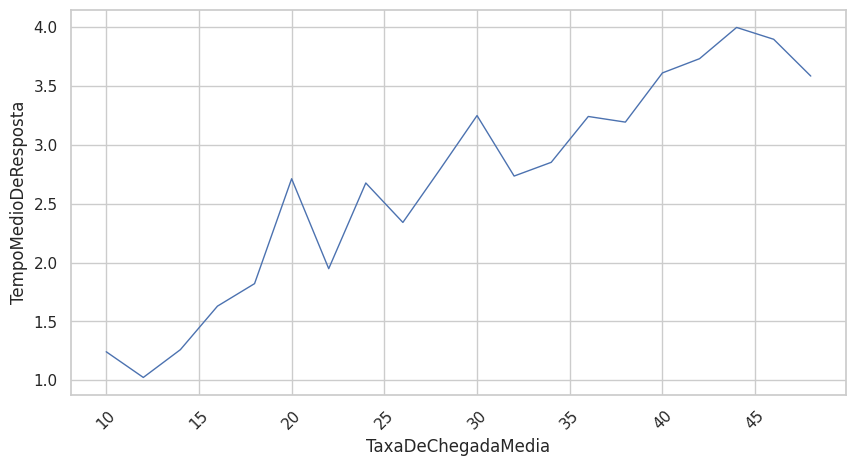

In [107]:
questao_1_df = questao_1_df.sort_values(by="TempoMedioDeResposta", ascending=False)

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.lineplot(data=questao_1_df, x="TaxaDeChegadaMedia", y="TempoMedioDeResposta", linewidth=1)
plt.xticks(rotation=45)
plt.show()


In [98]:
questao_1_df

,TaxaDeChegadaMedia,TempoDeServicoMedio,NumServidores,RequisicoesSubmetidas,RequisicoesConcluidas,TempoMedioDeResposta,TamanhoMedioDaFila
0,"10,000000","0,880000",10,117,101,"1,243170","6,128713"
1,"12,000000","0,880000",10,132,108,"1,025183","8,157407"
2,"14,000000","0,880000",10,110,96,"1,261047","5,385417"
3,"16,000000","0,880000",10,168,114,"1,630259","20,298246"
4,"18,000000","0,880000",10,158,110,"1,821284","20,063636"
5,"20,000000","0,880000",10,200,117,"2,711432","45,367521"
6,"22,000000","0,880000",10,217,131,"1,948235","32,007634"
7,"24,000000","0,880000",10,264,112,"2,675476","59,892857"
8,"26,000000","0,880000",10,257,118,"2,340727","48,593220"
9,"28,000000","0,880000",10,251,114,"2,790239","60,026316"
